<a href="https://colab.research.google.com/github/ganesh-207/Machine_learning/blob/main/KMeans_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Usecase/Requirement:

## Create different customer group on basis of Age,Income,Spending

## Data Gathering

In [1]:
# To ignore non-harmful warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Mall_Customers.csv'
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop_duplicates()

## EDA: To understand the data better

EDA => Correlations,Patterns in data

There are no missing values nor any duplicated data

## Determine X => Which contains features to be grouped

X => Age,Income nd Spending

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
X = df.drop(columns=['CustomerID','Gender'])
X.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [13]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
# Changing column name
X.columns = ['Age','Income','Spending']

In [15]:
X.columns

Index(['Age', 'Income', 'Spending'], dtype='object')

### to add a new column
### X['new_col_name'] = list/array of data

## Data Preprocessing and Data Cleaning

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [18]:
con = list(X.columns[X.dtypes != 'object'])

In [23]:
con_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()).set_output(transform='pandas')

In [24]:
X_pre = con_pipe.fit_transform(X)

In [25]:
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [26]:
pip install yellowbrick

## Restart the kernel once installation done

## Model Building using Elbow method

In [30]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

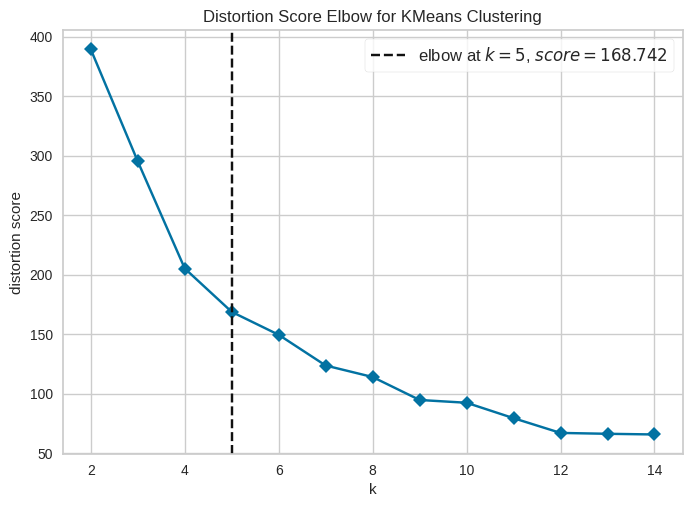

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
visualizer.show()

## Form above figure, k=5 is the best cluster possibility

## Final Model Building

In [32]:
best_kmeans = KMeans(n_clusters=5)
clusters = best_kmeans.fit_predict(X_pre)
clusters

array([4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4,
       0, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 2, 4, 4, 4, 3, 3, 3, 3, 4, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [33]:
# Centroids of all the clusters
best_kmeans.cluster_centers_

array([[ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.07333084,  0.97494509, -1.19729675],
       [ 1.20484056, -0.23577338, -0.05236781],
       [-0.98067852, -0.74305983,  0.46744035]])

In [34]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [35]:
clusters

array([4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4,
       0, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 2, 4, 4, 4, 3, 3, 3, 3, 4, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [36]:
X['Groups'] = clusters

In [37]:
X.head()

,Age,Income,Spending,Groups
0,19,15,39,4
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,4


In [38]:
X['Groups'] == 0

,Groups
0,False
1,False
2,True
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [39]:
X[X['Groups']==0]

,Age,Income,Spending,Groups
2,20,16,6,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0
22,46,25,5,0


In [40]:
len(X[X['Groups']==0])

20

In [41]:
for i in range(6):
  print(f'Cluster {i}')
  display(X[X['Groups']==i])
  print("===================")

Cluster 0


,Age,Income,Spending,Groups
2,20,16,6,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0
22,46,25,5,0


Cluster 1


,Age,Income,Spending,Groups
122,40,69,58,1
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1
133,31,72,71,1
135,29,73,88,1
137,32,73,73,1
139,35,74,72,1


Cluster 2


,Age,Income,Spending,Groups
112,38,64,42,2
121,38,67,40,2
124,23,70,29,2
126,43,71,35,2
128,59,71,11,2
130,47,71,9,2
132,25,72,34,2
134,20,73,5,2
136,44,73,7,2
138,19,74,10,2


Cluster 3


,Age,Income,Spending,Groups
40,65,38,35,3
46,50,40,55,3
50,49,42,52,3
53,59,43,60,3
54,50,43,45,3
55,47,43,41,3
56,51,44,50,3
57,69,44,46,3
59,53,46,46,3
60,70,46,56,3


Cluster 4


,Age,Income,Spending,Groups
0,19,15,39,4
1,21,15,81,4
3,23,16,77,4
4,31,17,40,4
5,22,17,76,4
7,23,18,94,4
9,30,19,72,4
11,35,19,99,4
13,24,20,77,4
15,22,20,79,4


Cluster 5


,Age,Income,Spending,Groups


In [42]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
X1 = df.drop(columns='CustomerID')
X1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Cluster - Visualization

In [44]:
X.columns

Index(['Age', 'Income', 'Spending', 'Groups'], dtype='object')

In [46]:
import plotly.express as ex
fig = ex.scatter_3d(data_frame=X,x='Age',y='Income',z='Spending',color='Groups')
fig.show()

## Considering Gender also into X1

In [47]:
X1.columns = ['Gender','Age','Income','Spending']
X1.head()

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [48]:
cat = list(X1.columns[X1.dtypes == 'object'])
con = list(X1.columns[X1.dtypes != 'object'])

In [55]:
cat_pipe2 = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore',sparse_output=False))

In [56]:
con_pipe2 = make_pipeline(SimpleImputer(strategy = 'mean'),StandardScaler()).set_output(transform = 'pandas')

In [58]:
pre = ColumnTransformer([
    ('cat',cat_pipe2,cat),
    ('con',con_pipe2,con)
]).set_output(transform='pandas')

In [59]:
X1_pre = pre.fit_transform(X1)
X1_pre.head()

,cat__Gender_Female,cat__Gender_Male,con__Age,con__Income,con__Spending
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980


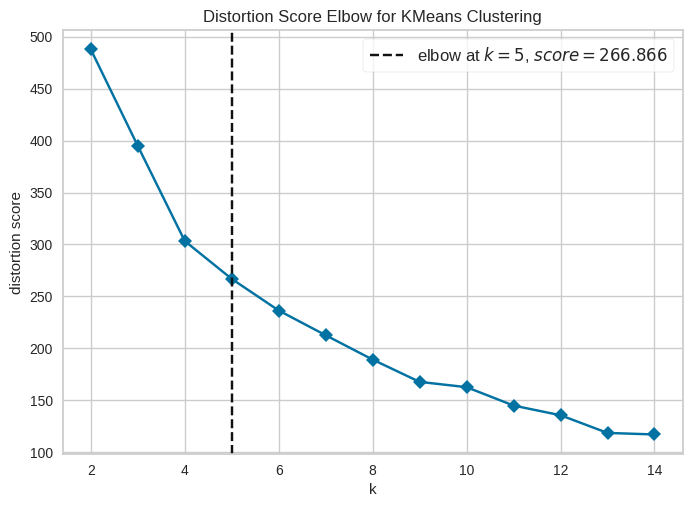

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
visualizer = kelbow_visualizer(base_model,X1_pre,k=(2,15),timings=False)
visualizer.show()

## Inertia

In [61]:
best_kmeans.inertia_

168.2475801755683

In [64]:
best_kmeans2.inertia_

266.86618082642093

## From above figure, k=5 clusters provides best grouping of data.

## Final Model Building

In [63]:
best_kmeans2 = KMeans(5)
clusters2 = best_kmeans2.fit_predict(X1_pre)
clusters2

array([1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 3, 3, 1, 0, 0, 3, 1,
       0, 0, 1, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1, 0, 3, 1, 3, 0, 1, 3, 0, 1,
       1, 0, 0, 1, 3, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3, 1, 0, 3, 3, 3,
       3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 4, 2, 4, 2, 4, 3, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [65]:
X1['Groups'] = clusters2
X1.head()

,Gender,Age,Income,Spending,Groups
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [66]:
for i in range(5):
  print(f'Cluster {i}')
  display(X1[X1['Groups']==i])
  print('====================')

Cluster 0


,Gender,Age,Income,Spending,Groups
6,Female,35,18,6,0
12,Female,58,20,15,0
22,Female,46,25,5,0
24,Female,54,28,14,0
26,Female,45,28,32,0
28,Female,40,29,31,0
34,Female,49,33,14,0
36,Female,42,34,17,0
38,Female,36,37,26,0
40,Female,65,38,35,0


Cluster 1


,Gender,Age,Income,Spending,Groups
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
5,Female,22,17,76,1
7,Female,23,18,94,1
9,Female,30,19,72,1
11,Female,35,19,99,1
13,Female,24,20,77,1


Cluster 2


,Gender,Age,Income,Spending,Groups
124,Female,23,70,29,2
126,Male,43,71,35,2
130,Male,47,71,9,2
132,Female,25,72,34,2
134,Male,20,73,5,2
136,Female,44,73,7,2
138,Male,19,74,10,2
140,Female,57,75,5,2
142,Female,28,76,40,2
144,Male,25,77,12,2


Cluster 3


,Gender,Age,Income,Spending,Groups
8,Male,64,19,3,3
10,Male,67,19,14,3
14,Male,37,20,13,3
18,Male,52,23,29,3
30,Male,60,30,4,3
32,Male,53,33,4,3
42,Male,48,39,36,3
53,Male,59,43,60,3
55,Male,47,43,41,3
57,Male,69,44,46,3


Cluster 4


,Gender,Age,Income,Spending,Groups
123,Male,39,69,91,4
125,Female,31,70,77,4
127,Male,40,71,95,4
129,Male,38,71,75,4
131,Male,39,71,75,4
133,Female,31,72,71,4
135,Female,29,73,88,4
137,Male,32,73,73,4
139,Female,35,74,72,4
141,Male,32,75,93,4


In [67]:
X.to_csv('Age_Income_Spending-Cluster.csv',index=False)

In [68]:
X1.to_csv('GenderAgeIncomeSpending-Clusters.csv',index=False)